In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

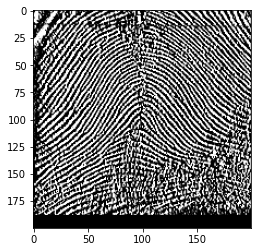

[[  0  11 248 ...   2 228  86]
 [  0  13 255 ...   3 102  70]
 [  9 164 255 ...   0   0 110]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(200, 200)


In [11]:
#Load all image files along with the label based on the folder name
DATADIR = "dataset_Fingerprint"
CATEGORIES = ["Arch" , "Leftloop", "Rightloop", "Tentarch", "Whorl"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array)

print(img_array.shape)

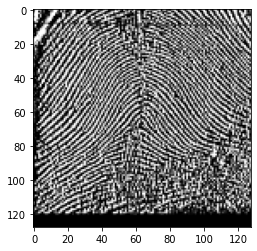

In [12]:
#Preprocessing the image with resize the image with 128 x 128 pixels
img_size = 128
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
#each images are assign with the labels, and put in the variable training_data
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exeption as e:
                pass

create_training_data()

In [16]:
#checking the number of dataset
print(len(training_data))

1275


In [17]:
#checking the value of the labels, the labels still not random yet. It need to reshuffle
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [19]:
#reshufle the dataset
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
0
4
0
2
0
0
2
0
2


In [0]:
#separate the data to variable X and labels to variable y
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)

In [0]:
from sklearn.model_selection import train_test_split

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(X,
	np.array(y), test_size=0.25)

In [23]:
#checking the shape for each train and test data and label
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(956, 128, 128, 1)
(956,)
(319, 128, 128, 1)
(319,)


In [0]:
#normalized the data value
trainX = trainX/255.0
testX = testX/255.0

In [37]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape = trainX.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100))
model.add(layers.Dense(5))

model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 8)       80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)       

In [39]:
#training and validate the dataset
from keras.utils import to_categorical

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX, to_categorical(trainY), validation_data=(testX, to_categorical(testY)),epochs=20, batch_size=32)

Using TensorFlow backend.


Epoch 1/20
30/30 [==============================] - 0s 14ms/step - loss: 1.4181 - accuracy: 0.4163 - val_loss: 1.3141 - val_accuracy: 0.4138
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.8932 - accuracy: 0.6789 - val_loss: 0.7444 - val_accuracy: 0.7304
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6525 - accuracy: 0.7594 - val_loss: 0.6358 - val_accuracy: 0.7649
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5562 - accuracy: 0.7950 - val_loss: 0.5266 - val_accuracy: 0.8088
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4509 - accuracy: 0.8379 - val_loss: 0.5686 - val_accuracy: 0.8119
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3798 - accuracy: 0.8661 - val_loss: 0.4263 - val_accuracy: 0.8370
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3346 - accuracy: 0.8828 - val_loss: 0.4506 - val_accuracy: 0.8433
Epoch 8/20
30/30 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


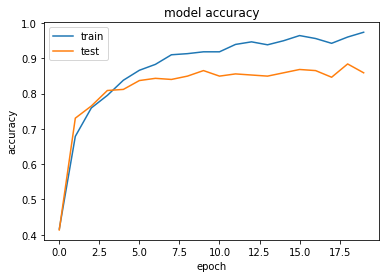

In [42]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

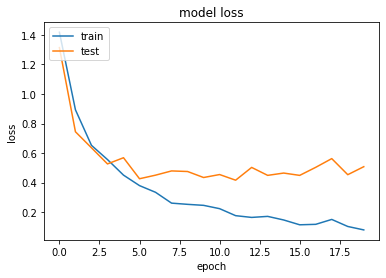

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()